Analysis 5. Take the data of fares and distances from day 1 to day 10 of September as training data, and
data from day 11 to day 17 as testing data. Apply both linear regression and k-nearest neighbor (with
k = {1, 5, 10}) to identify the fares in the testing data given the distances and compare the results. Which
method is better and why? What is the difference between performance of k-NN with different values of k?

In [5]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn
from datetime import datetime
seaborn.set_context(rc={'lines.markeredgewidth': 1.0})
%matplotlib inline

In [6]:
taxi = Table().read_table("SF_taxi_data.csv")
refined_data = taxi.where("num", 1).where("fare ($)", are.above(3.5))

In [17]:
refined_data

id,departure time,arrival time,fare ($),num,dep lon,dep lat,arr lon,arr lat,deptaz,arrtaz,dist (miles)
0,2012-09-01 00:00:00,9/1/12 0:20,13.2,1,-122.414,37.8027,-122.421,37.7854,38,30,1.98084
1,2012-09-01 00:00:00,9/1/12 0:31,10.65,1,-122.42,37.7861,-122.435,37.7622,30,94,2.40224
2,2012-09-01 00:00:00,9/1/12 0:49,9,1,-122.415,37.7747,-122.408,37.7826,10,11,0.479348
4,2012-09-01 00:00:00,9/1/12 1:13,7.35,1,-122.43,37.7978,-122.418,37.789,45,32,1.03807
5,2012-09-01 00:00:00,9/1/12 1:52,11.75,1,-122.433,37.7841,-122.411,37.787,77,7,0.960851
6,2012-09-01 00:00:00,9/1/12 2:51,5.15,1,-122.409,37.7856,-122.412,37.791,7,29,0.414315
7,2012-09-01 00:00:00,9/1/12 3:47,43.65,1,-122.403,37.7927,-122.386,37.6181,2,239,14.5105
8,2012-09-01 00:00:00,9/1/12 0:57,46.75,1,-122.387,37.6174,-122.407,37.7889,239,5,14.2747
9,2012-09-01 00:00:00,9/1/12 4:43,6.25,1,-122.422,37.7977,-122.418,37.789,34,31,0.685312
10,2012-09-01 00:00:00,9/1/12 2:05,9.55,1,-122.418,37.791,-122.429,37.7724,32,81,1.59807


In [9]:
def parse_prefix(line, fmt):
    try:
        t = datetime.strptime(line, fmt)
    except ValueError as v:
        if len(v.args) > 0 and v.args[0].startswith('unconverted data remains: '):
            line = line[:-(len(v.args[0]) - 26)]
            t = datetime.strptime(line, fmt)
        else:
            raise
    return t

In [20]:
#refined_data['departure time'] = refined_data.select("departure time").apply(lambda x: parse_prefix(x[0],"%m/%d/%y"))
refined_data

id,departure time,arrival time,fare ($),num,dep lon,dep lat,arr lon,arr lat,deptaz,arrtaz,dist (miles)
0,2012-09-01 00:00:00,9/1/12 0:20,13.2,1,-122.414,37.8027,-122.421,37.7854,38,30,1.98084
1,2012-09-01 00:00:00,9/1/12 0:31,10.65,1,-122.42,37.7861,-122.435,37.7622,30,94,2.40224
2,2012-09-01 00:00:00,9/1/12 0:49,9,1,-122.415,37.7747,-122.408,37.7826,10,11,0.479348
4,2012-09-01 00:00:00,9/1/12 1:13,7.35,1,-122.43,37.7978,-122.418,37.789,45,32,1.03807
5,2012-09-01 00:00:00,9/1/12 1:52,11.75,1,-122.433,37.7841,-122.411,37.787,77,7,0.960851
6,2012-09-01 00:00:00,9/1/12 2:51,5.15,1,-122.409,37.7856,-122.412,37.791,7,29,0.414315
7,2012-09-01 00:00:00,9/1/12 3:47,43.65,1,-122.403,37.7927,-122.386,37.6181,2,239,14.5105
8,2012-09-01 00:00:00,9/1/12 0:57,46.75,1,-122.387,37.6174,-122.407,37.7889,239,5,14.2747
9,2012-09-01 00:00:00,9/1/12 4:43,6.25,1,-122.422,37.7977,-122.418,37.789,34,31,0.685312
10,2012-09-01 00:00:00,9/1/12 2:05,9.55,1,-122.418,37.791,-122.429,37.7724,32,81,1.59807


In [25]:
training = refined_data.where(list(map(lambda x: x.day >= 1 and x.day <=10, refined_data["departure time"])))
training = training.where(list(map(lambda x: x.month == 9, training['departure time'])))

In [32]:
simp_training = training.select('fare ($)', 'dist (miles)')

In [33]:
testing = refined_data.where(list(map(lambda x: x.day >= 11 and x.day <=17, refined_data["departure time"])))
testing

id,departure time,arrival time,fare ($),num,dep lon,dep lat,arr lon,arr lat,deptaz,arrtaz,dist (miles)
28322,2012-09-11 00:00:00,9/11/12 1:12,45.65,1,-122.386,37.6173,-122.401,37.795,239,24,14.7033
28351,2012-09-11 00:00:00,9/11/12 0:34,7.9,1,-122.4,37.7943,-122.412,37.7878,22,7,1.18652
28359,2012-09-11 00:00:00,9/11/12 0:18,7.9,1,-122.421,37.765,-122.438,37.7742,106,85,1.33785
28360,2012-09-11 00:00:00,9/11/12 0:29,9.55,1,-122.438,37.7775,-122.435,37.797,86,45,1.82918
28418,2012-09-11 00:00:00,9/11/12 0:16,9.55,1,-122.4,37.7906,-122.421,37.7927,4,33,1.31748
28463,2012-09-11 00:00:00,9/11/12 4:40,9.25,1,-122.429,37.7666,-122.443,37.7652,104,83,0.797884
28495,2012-09-11 00:00:00,9/11/12 5:24,51.06,1,-122.436,37.7649,-122.384,37.6156,83,239,14.0658
28496,2012-09-11 00:00:00,9/11/12 5:49,16.7,1,-122.466,37.7867,-122.395,37.7944,65,22,4.08424
28522,2012-09-11 00:00:00,9/11/12 4:36,18.35,1,-122.399,37.7764,-122.432,37.7318,18,134,4.61251
28526,2012-09-11 00:00:00,9/11/12 2:03,9.55,1,-122.406,37.7976,-122.393,37.7765,37,109,2.15043


In [56]:
simp_testing = testing.select('fare ($)', 'dist (miles)')

In [57]:
#fitting linear regression 
def norm(table, label):
    return (table.column(label) - np.mean(table.column(label))) / np.std(table.column(label))

norm_x = norm(simp_training, 'dist (miles)')
norm_y = norm(simp_training, 'fare ($)')
norm_training = Table().with_column('norm x', norm_x, 'norm y', norm_y)
norm_xt = norm(simp_testing, 'dist (miles)')
norm_yt = norm(simp_testing, 'fare ($)')
norm_testing = Table().with_column('norm x', norm_xt, 'norm y', norm_yt)

In [43]:
correlation = np.mean(norm_training.column(0) * norm_training.column(1))
slope = correlation * (np.std(simp_training.column('fare ($)')) / np.std(simp_training.column('dist (miles)')))
intercept = np.mean(simp_training.column('fare ($)')) - slope * np.mean(simp_training.column('dist (miles)'))

Text(0.5,1,'predicting prices')

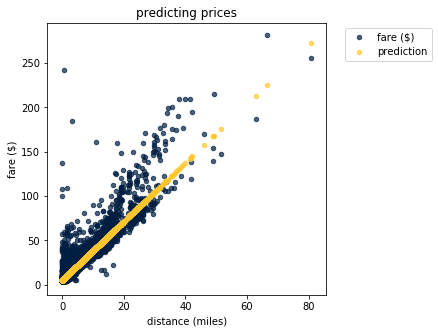

In [106]:
prediction = slope * simp_training.column('dist (miles)') + intercept
simp_training = simp_training.with_column('prediction', prediction )
simp_training.scatter('dist (miles)')
plt.xlabel("distance (miles)")
plt.ylabel("fare ($)")
plt.title("predicting prices")

In [54]:
error = simp_training.column('fare ($)') - prediction
rmse = np.sqrt(np.mean(error**2))
rmse

5.0049333071515694

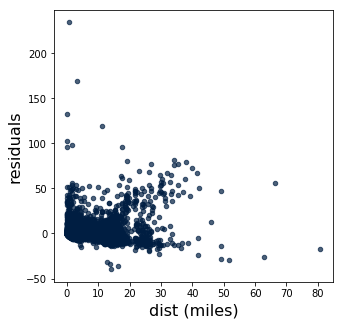

In [94]:
res_simp_training = simp_training.with_column('residuals', error)
res_simp_training.scatter('dist (miles)','residuals' )

## k-NN

In [60]:
def distance(x,y):
    return np.abs(x - y)
x = norm_training.select('norm x').values
x

array([[-0.35303905],
       [-0.26111667],
       [-0.68056226],
       ..., 
       [-0.36109767],
       [-0.54659323],
       [ 0.45196022]])

In [65]:
test_distance = np.zeros([norm_testing.num_rows, norm_training.num_rows])
for i in np.arange(norm_testing.num_rows):
    x = norm_training.select('norm x').values
    xt = norm_testing.select('norm x').values[i,:]
    test_distance[i,:] = np.sqrt(np.sum((x - xt)**2,  axis = 1))
    
test_distance

array([[ 2.66647264,  2.57455026,  2.99399585, ...,  2.67453126,
         2.86002682,  1.86147337],
       [ 0.18453104,  0.27645342,  0.14299217, ...,  0.17647242,
         0.00902314,  0.98953031],
       [ 0.15261176,  0.24453414,  0.17491146, ...,  0.14455313,
         0.04094242,  0.95761103],
       ..., 
       [ 0.31963165,  0.41155403,  0.00789156, ...,  0.31157303,
         0.12607747,  1.12463092],
       [ 2.54659615,  2.45467377,  2.87411936, ...,  2.55465477,
         2.74015033,  1.74159688],
       [ 0.01602628,  0.07589611,  0.34354949, ...,  0.0240849 ,
         0.20958046,  0.788973  ]])

In [66]:
sorted_test_distancek1 = np.argsort(test_distance, 1)[:,0]
sorted_test_distancek1 #the indexes of the fares 

array([16213,  2370,  4787, ..., 30316, 28524, 30541])

In [71]:
labels_k1 = simp_training.column('fare ($)')[sorted_test_distancek1]
labels_k1 #this is wrong idk man 

array([ 44.2 ,   9.  ,  10.65, ...,  10.1 ,  56.95,  11.75])

In [75]:
accuracyk1 = np.count_nonzero(labels_k1 == testing.column('fare ($)'))/testing.num_rows
accuracyk1

0.05579328505595787

In [86]:
sorted_test_distancek5 = np.argsort(test_distance, 1)[:,np.arange(0,5)]
sorted_test_distancek5

array([[16213,  5069, 24126, 26520, 31513],
       [ 2370, 10369, 32807, 33250, 30286],
       [ 4787, 24192, 16895, 19243, 18871],
       ..., 
       [30316, 16891, 29148, 32116,  8526],
       [28524, 33477, 18459, 23758, 14088],
       [30541, 33030, 11816, 16066, 23936]])

In [99]:
k5 = training.column('fare ($)')[sorted_test_distancek5]
labels_k5 = np.zeros(len(k5))
for i in np.arange(len(k5)):
    count = np.argmax(np.bincount(k5[i,:]))
    labels_k5[i] = count
labels_k5

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [81]:
accuracyk3 = np.count_nonzero(labels_k3 == testing.column('fare ($)'))/testing.num_rows
accuracyk3

0.0

In [89]:
sorted_test_distancek10 = np.argsort(test_distance, 1)[:,np.arange(0,10)]
sorted_test_distancek10

array([[16213,  5069, 24126, ..., 23170, 14358,  9644],
       [ 2370, 10369, 32807, ...,  2862, 21987, 16057],
       [ 4787, 24192, 16895, ..., 24379,  6879,  7427],
       ..., 
       [30316, 16891, 29148, ..., 32924, 31342, 32452],
       [28524, 33477, 18459, ..., 20111, 31025, 25863],
       [30541, 33030, 11816, ..., 16749, 29342, 20757]])

In [90]:
k10 = training.column('fare ($)')[sorted_test_distancek10]
labels_k10 = np.zeros(len(k10))
for i in np.arange(len(k10)):
    count = np.argmax(np.bincount(k10[i,:]))
    labels_k10[i] = count
labels_k10

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [98]:
accuracyk10 = np.count_nonzero(labels_k10 == testing.column('fare ($)'))/testing.num_rows
accuracyk10

0.0

In [97]:
#which method is better and why:
# based on the residual plot and correclation, 
#it seems to be that linear regression is not the most appropriate model
#for predicting data in this scenario. There is a pattern in the residual plot 
#even though the correlation coefficient was realtively high (0.902)


In [96]:
#what happens as K gets larger:
#as K increases, the accuracy of the prediction (performance of the classifier) becomes higher. 
#This makes sense since we are taking into account more data every time and comapring the values with more training values.